# Importing Necessary Modules

In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
sb.set()

fashiondata_raw = pd.read_csv('fashion_data_2018_2022.csv')
fashiondata_extracted = pd.DataFrame(fashiondata_raw[["gender", "color", "price", "material", "year_of_sale", "age_group", "season", "category", "sales_count", "average_rating"]])

df = fashiondata_extracted.groupby(['year_of_sale', 'season', 'category']).sum()
pivoted = pd.pivot_table(df, values='sales_count', index=['year_of_sale', 'season'], columns=['category'])
pivoted = pivoted.fillna(0).astype(int)

summed_sales = pivoted.sum(axis=1)
finaldataset = pd.DataFrame(summed_sales, columns=['total_sales'])

# Total Sales Count of Each Season for Each Year

<IPython.core.display.Javascript object>


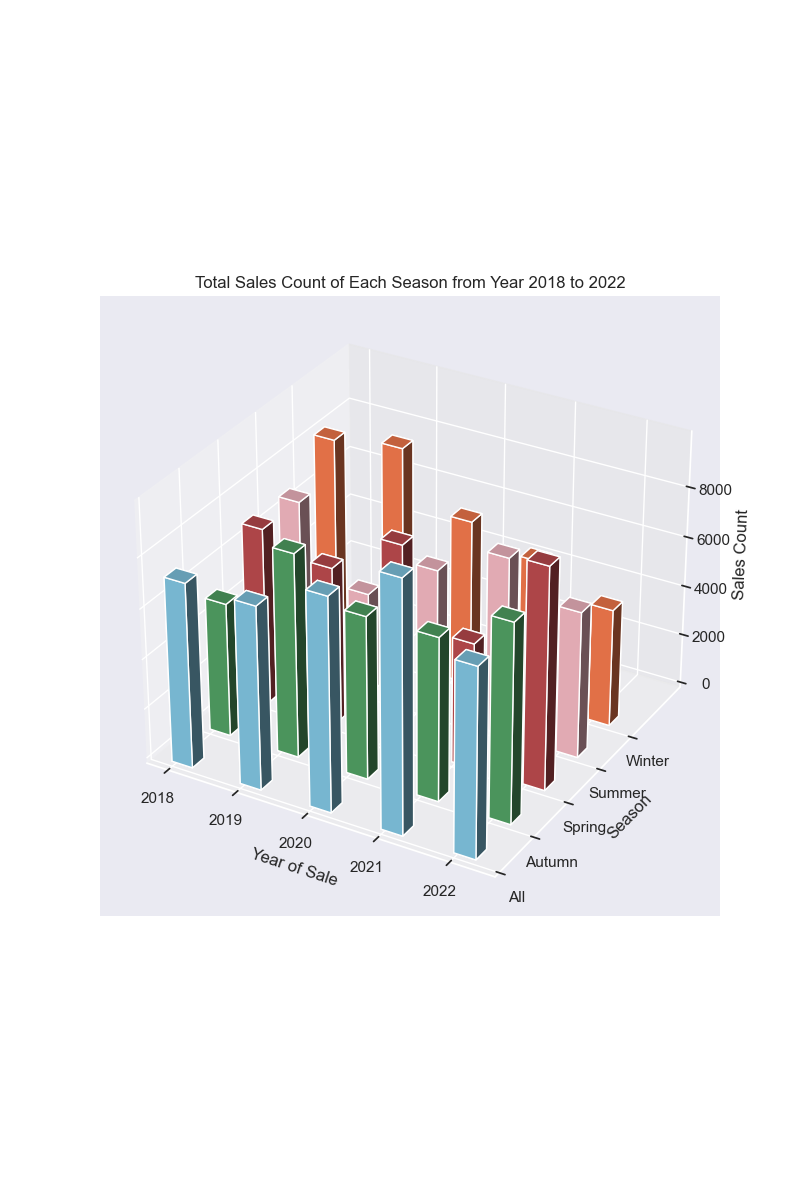

In [8]:
%matplotlib notebook

Dict = {"All": 0,
        "Autumn": 1,
        "Spring": 2,
        "Summer": 3,
        "Winter": 4}

x = []
y = []
z = [0]*25
dx = [0.3]*25
dy = [0.3]*25
dz = []

for key, value in finaldataset["total_sales"].items():
    x.append(key[0])
    y.append(Dict[key[1]])
    dz.append(value)

colors = ["skyblue", "g", "r", "pink", "coral"]*5

plt.figure(figsize=(8, 12))
ax = plt.axes(projection="3d")
ax.bar3d(x, y, z, dx, dy, dz, color=colors)

# Set y-axis tick locations and labels
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels(["All", "Autumn", "Spring", "Summer", "Winter"])

ax.set_ylim(0, 5.5)
ax.set_xlabel("Year of Sale")
ax.set_ylabel("Season")
ax.set_zlabel("Sales Count")
ax.set_title("Total Sales Count of Each Season from Year 2018 to 2022")

plt.show()

# Sales Count for Different Clothes of Each Season for Each Year

<IPython.core.display.Javascript object>


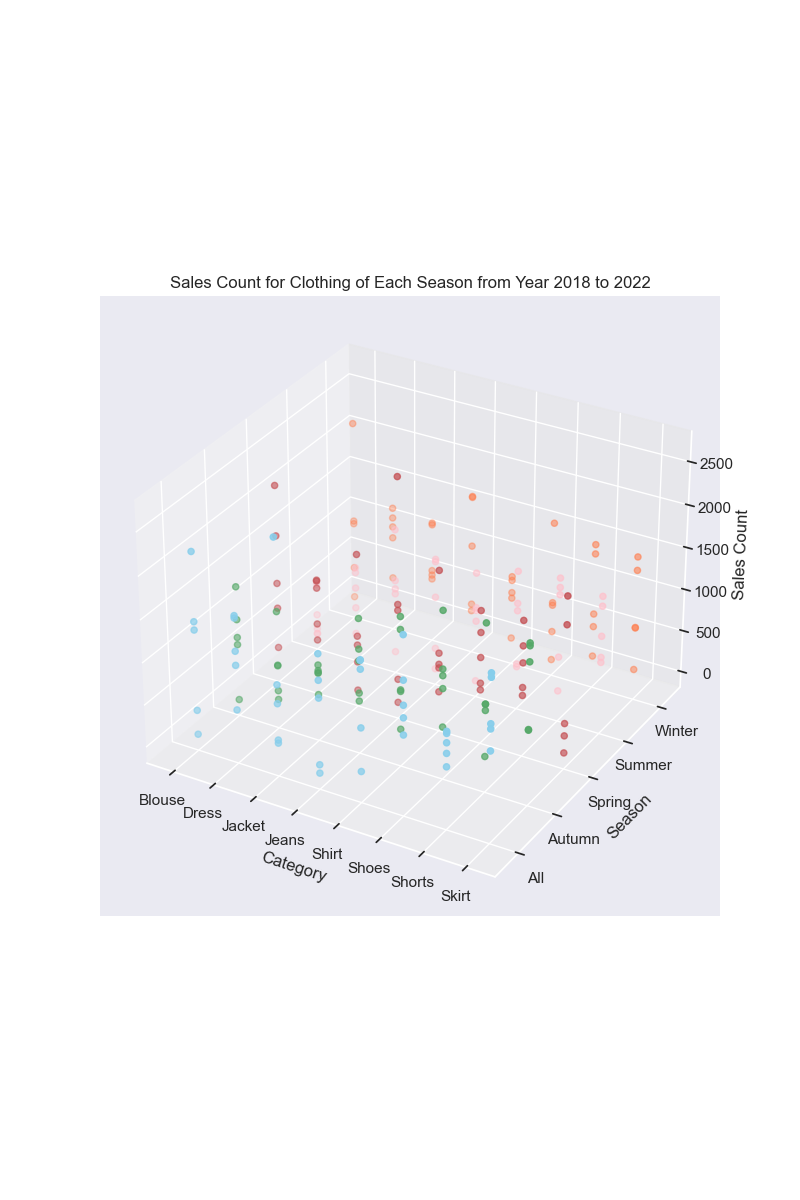

In [9]:
%matplotlib notebook

Seas = {"All": 0,
        "Autumn": 1,
        "Spring": 2,
        "Summer": 3,
        "Winter": 4}

Cate = {"Blouse": 0,
        "Dress": 1,
        "Jacket": 2,
        "Jeans": 3,
        "Shirt": 4,
        "Shoes": 5,
        "Shorts": 6,
        "Skirt": 7}

x = []
y = []
z = []

for category, item1 in pivoted.items():
    for year, item2 in item1.items():
        x.append(Cate[category])
        y.append(Seas[year[1]])
        z.append(item2)

plt.figure(figsize=(8, 12))
ax = plt.axes(projection="3d")
ax.scatter(x, y, z, color=["skyblue", "g", "r", "pink", "coral"] * 8 * 5)

# Set x-axis and y-axis tick locations and labels
ax.set_xticks(list(Cate.values()))
ax.set_xticklabels(list(Cate.keys()))
ax.set_xlim(-0.5, 7.5)

ax.set_yticks(list(Seas.values()))
ax.set_yticklabels(list(Seas.keys()))
ax.set_ylim(-0.5, 4.5)

ax.set_xlabel("Category")
ax.set_ylabel("Season")
ax.set_zlabel("Sales Count")
ax.set_title("Sales Count for Clothing of Each Season from Year 2018 to 2022")

plt.show()

# Total Sales Count of Different Clothes for Each Season of Each Year

<IPython.core.display.Javascript object>


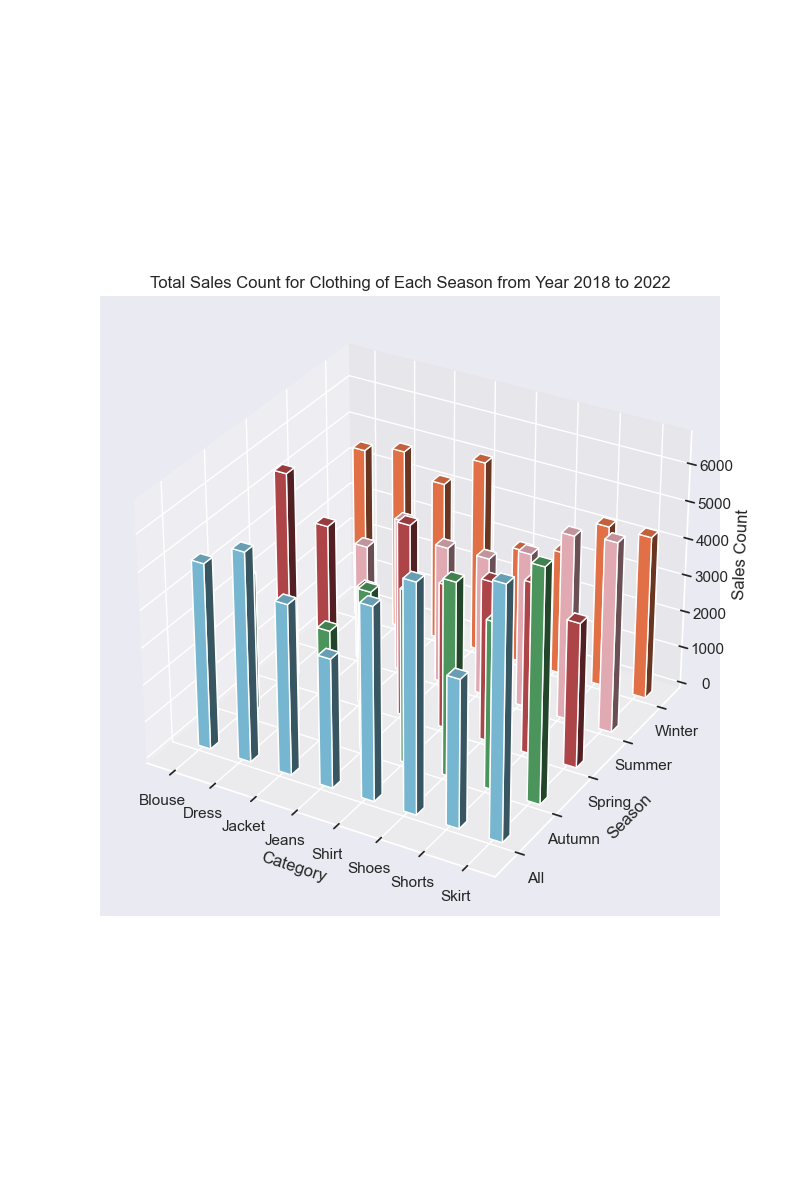

In [11]:
%matplotlib notebook

Seas = {"All": 0,
        "Autumn": 1,
        "Spring": 2,
        "Summer": 3,
        "Winter": 4}

Cate = {"Blouse": 0,
        "Dress": 1,
        "Jacket": 2,
        "Jeans": 3,
        "Shirt": 4,
        "Shoes": 5,
        "Shorts": 6,
        "Skirt": 7}

x = []
y = []
z = [0]*40
dx = [0.3]*40
dy = [0.2]*40
dz = []

for category, item1 in pivoted.items():
    for season in ("All", "Autumn", "Spring", "Summer", "Winter"):
        dz.append(sum([item1[year][season] for year in range(2018, 2023)]))
        x.append(Cate[category])
        y.append(Seas[season])

plt.figure(figsize=(8, 12))
ax = plt.axes(projection="3d")
ax.bar3d(x, y, z, dx, dy, dz, color=["skyblue", "g", "r", "pink", "coral"]*8)

# Set x-axis and y-axis tick locations and labels
ax.set_xticks(list(Cate.values()))
ax.set_xticklabels(list(Cate.keys()))
ax.set_xlim(-0.5, 7.5)

ax.set_yticks(list(Seas.values()))
ax.set_yticklabels(list(Seas.keys()))
ax.set_ylim(-0.5, 4.5)

ax.set_xlabel("Category")
ax.set_ylabel("Season")
ax.set_zlabel("Sales Count")
ax.set_title("Total Sales Count for Clothing of Each Season from Year 2018 to 2022")

plt.show()

# Visualisation of Numerical Data

### Distribution of Price

<IPython.core.display.Javascript object>


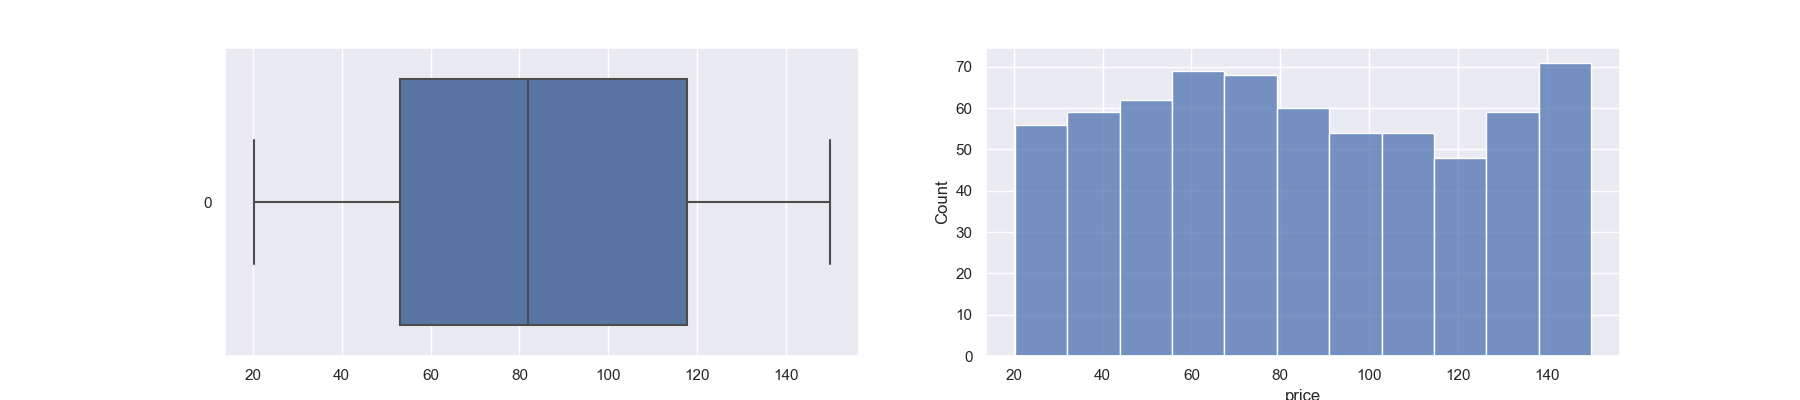

<Axes: xlabel='price', ylabel='Count'>

In [12]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = fashiondata_extracted['price'], orient = "h", ax = axes[0])
sb.histplot(data = fashiondata_extracted['price'], ax = axes[1])

### Distribution of Sales Count

<IPython.core.display.Javascript object>


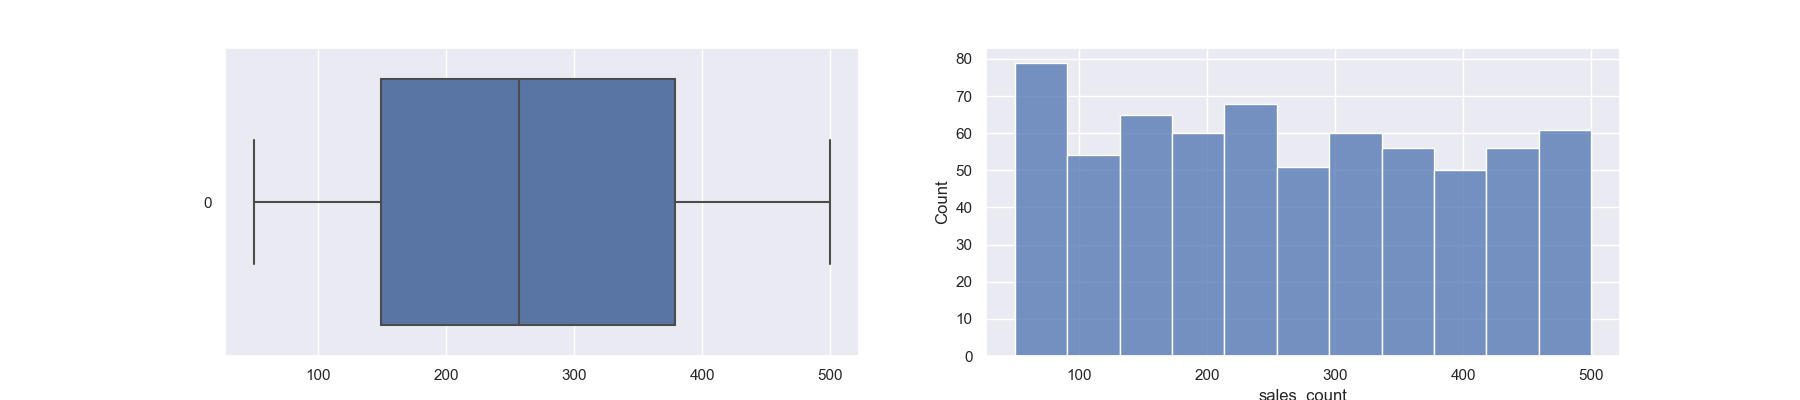

<Axes: xlabel='sales_count', ylabel='Count'>

In [13]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = fashiondata_extracted['sales_count'], orient = "h", ax = axes[0])
sb.histplot(data = fashiondata_extracted['sales_count'], ax = axes[1])

### Distribution of Average Rating

<IPython.core.display.Javascript object>


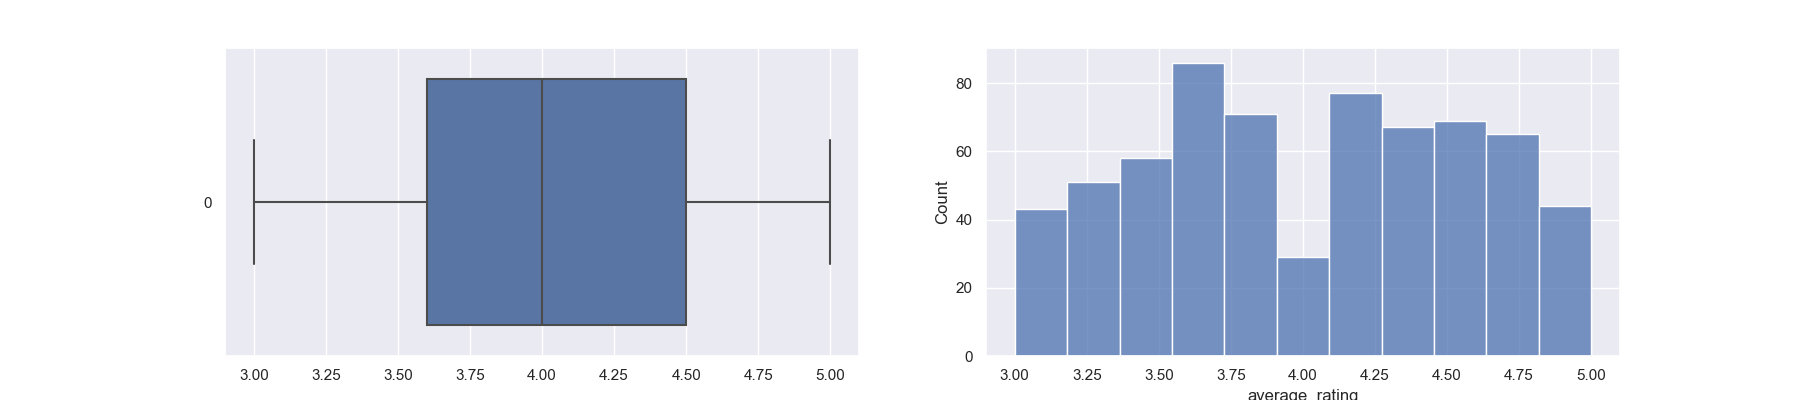

<Axes: xlabel='average_rating', ylabel='Count'>

In [14]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = fashiondata_extracted['average_rating'], orient = "h", ax = axes[0])
sb.histplot(data = fashiondata_extracted['average_rating'], ax = axes[1])

# Visualisation of Categorical Data

### Distribution of Gender

<IPython.core.display.Javascript object>


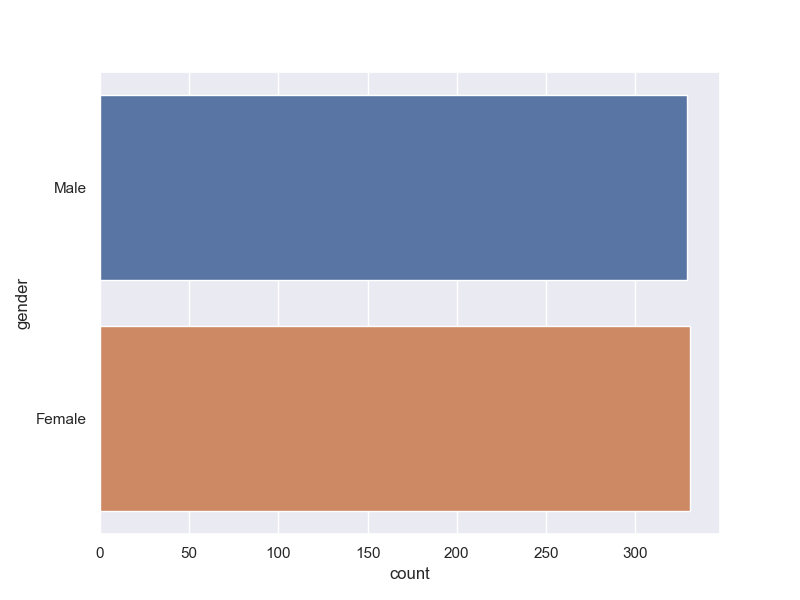

<Axes: xlabel='count', ylabel='gender'>

In [15]:
plt.figure(figsize=(8, 6)) 
sb.countplot(y='gender', data=fashiondata_raw)

### Distribution of Age Group, Color, Material, Category, Season

<IPython.core.display.Javascript object>


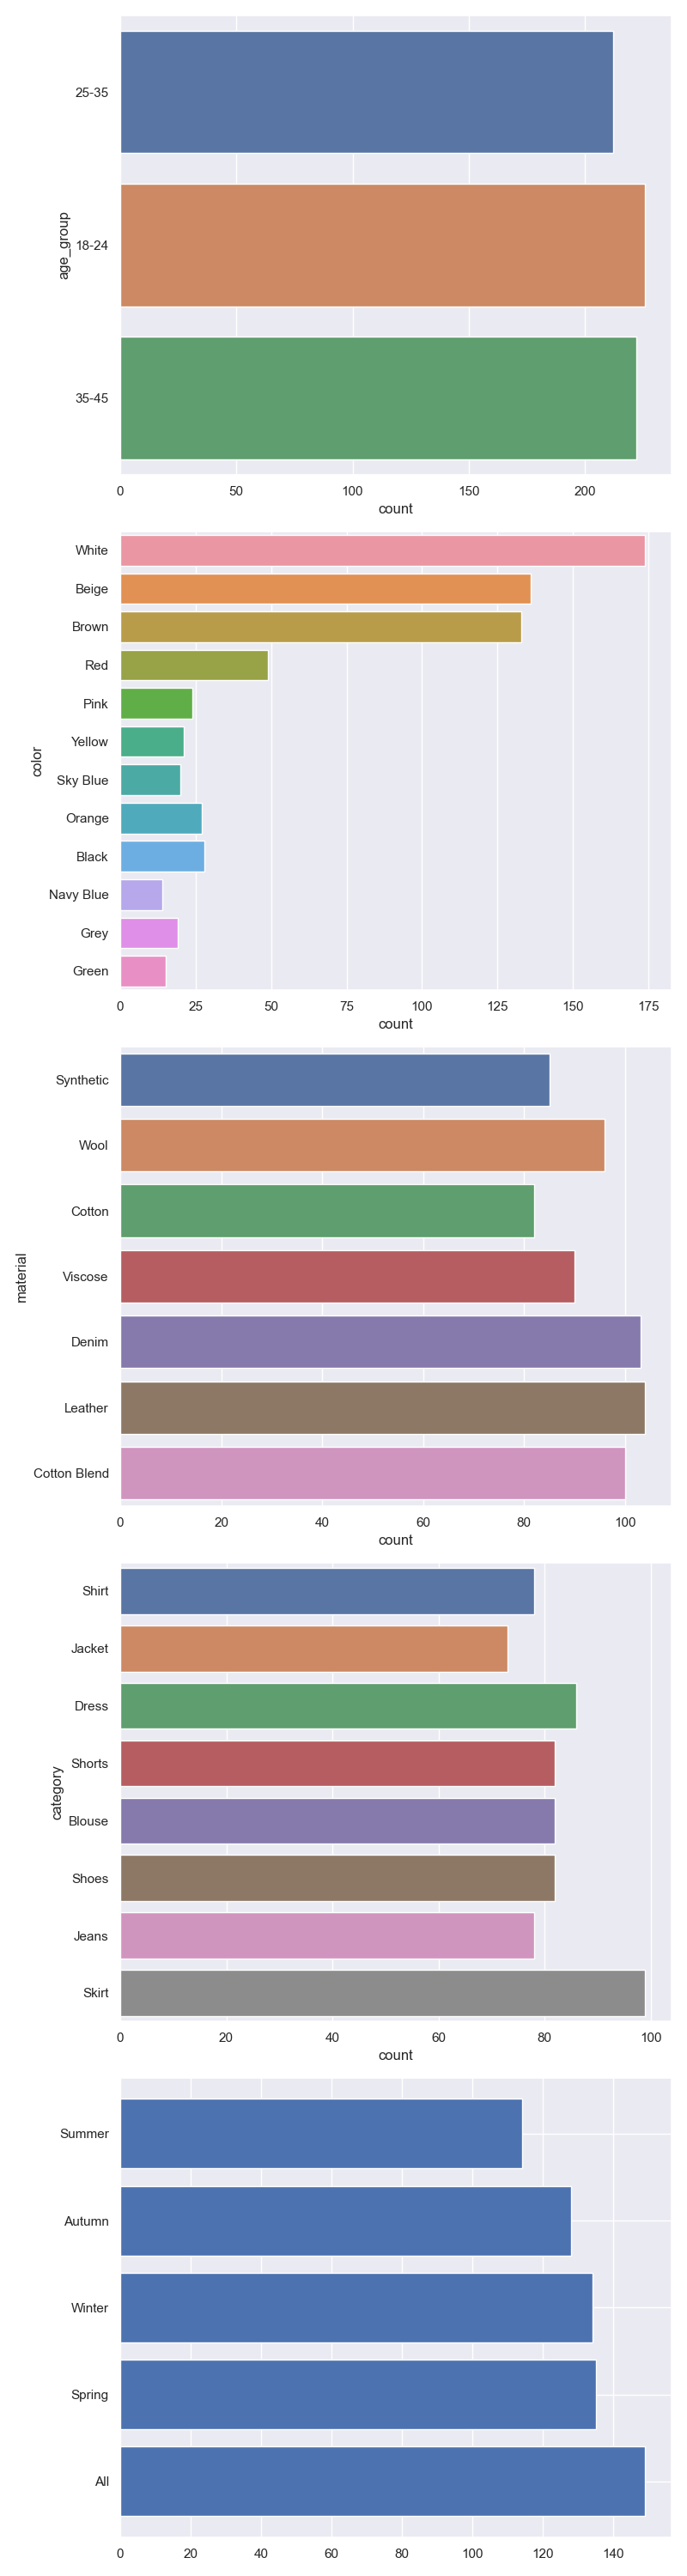

In [16]:
# Age Group
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(8, 30))  
sb.countplot(y='age_group', data=fashiondata_extracted, ax=ax1) 

# Color
sb.countplot(y='color', data=fashiondata_extracted, ax=ax2) 

# Material
sb.countplot(y='material', data=fashiondata_extracted, ax=ax3)  

# Category
sb.countplot(y='category', data=fashiondata_extracted, ax=ax4) 

# Season
season_counts = fashiondata_extracted['season'].value_counts()
ax5.barh(season_counts.index, season_counts.values)  # Use ax.barh to plot horizontal bar plot

plt.tight_layout()
plt.show()

# Relationship Between Gender and Numerical Data

### Gender vs Price

<IPython.core.display.Javascript object>


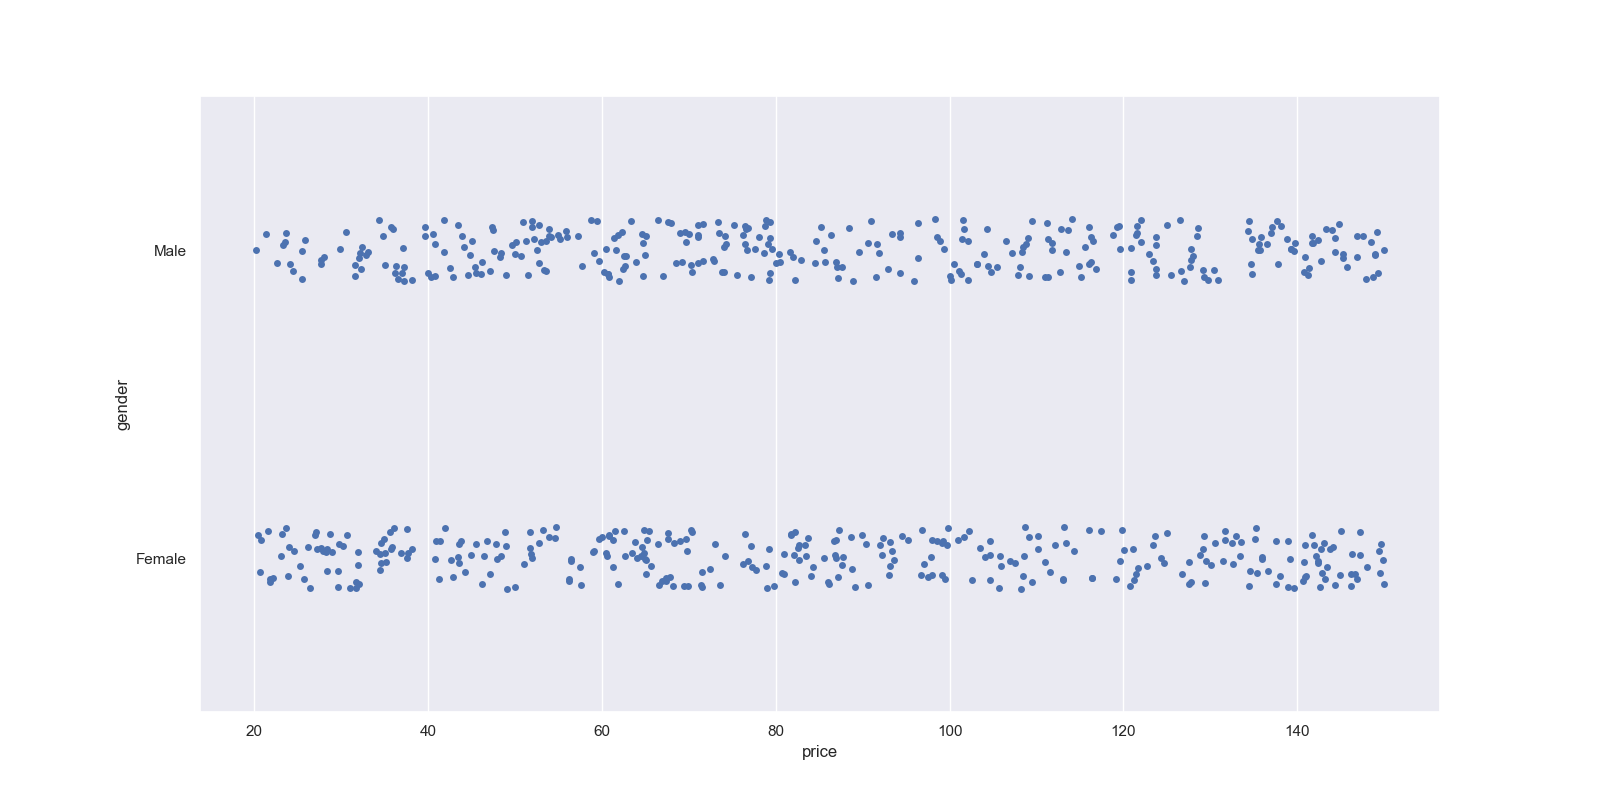

<Axes: xlabel='price', ylabel='gender'>

In [17]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'price', y = 'gender', data = fashiondata_extracted)

<IPython.core.display.Javascript object>


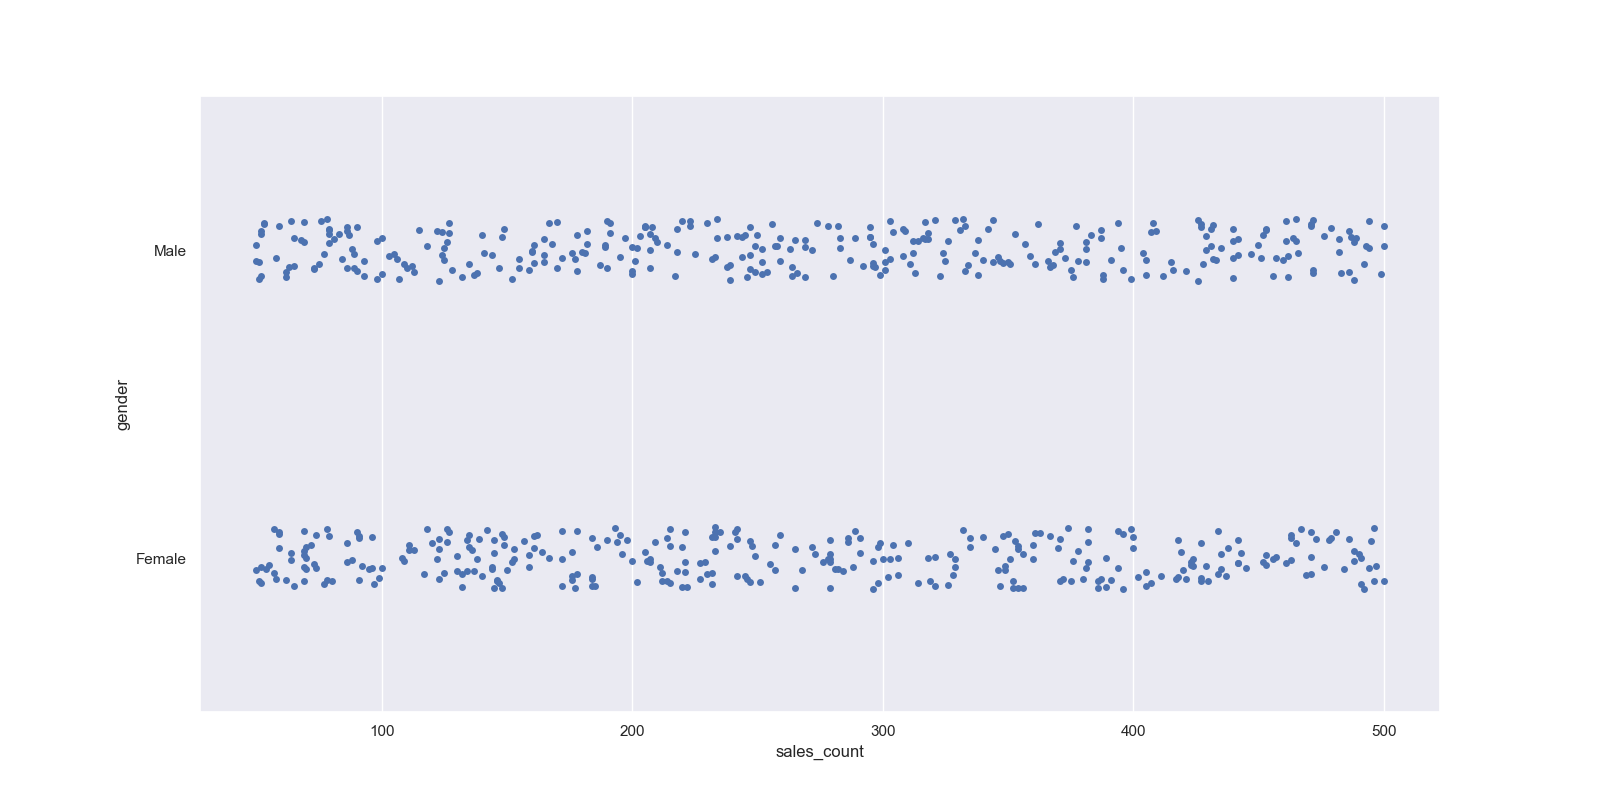

<Axes: xlabel='sales_count', ylabel='gender'>

In [18]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'sales_count', y = 'gender', data = fashiondata_extracted)

<IPython.core.display.Javascript object>


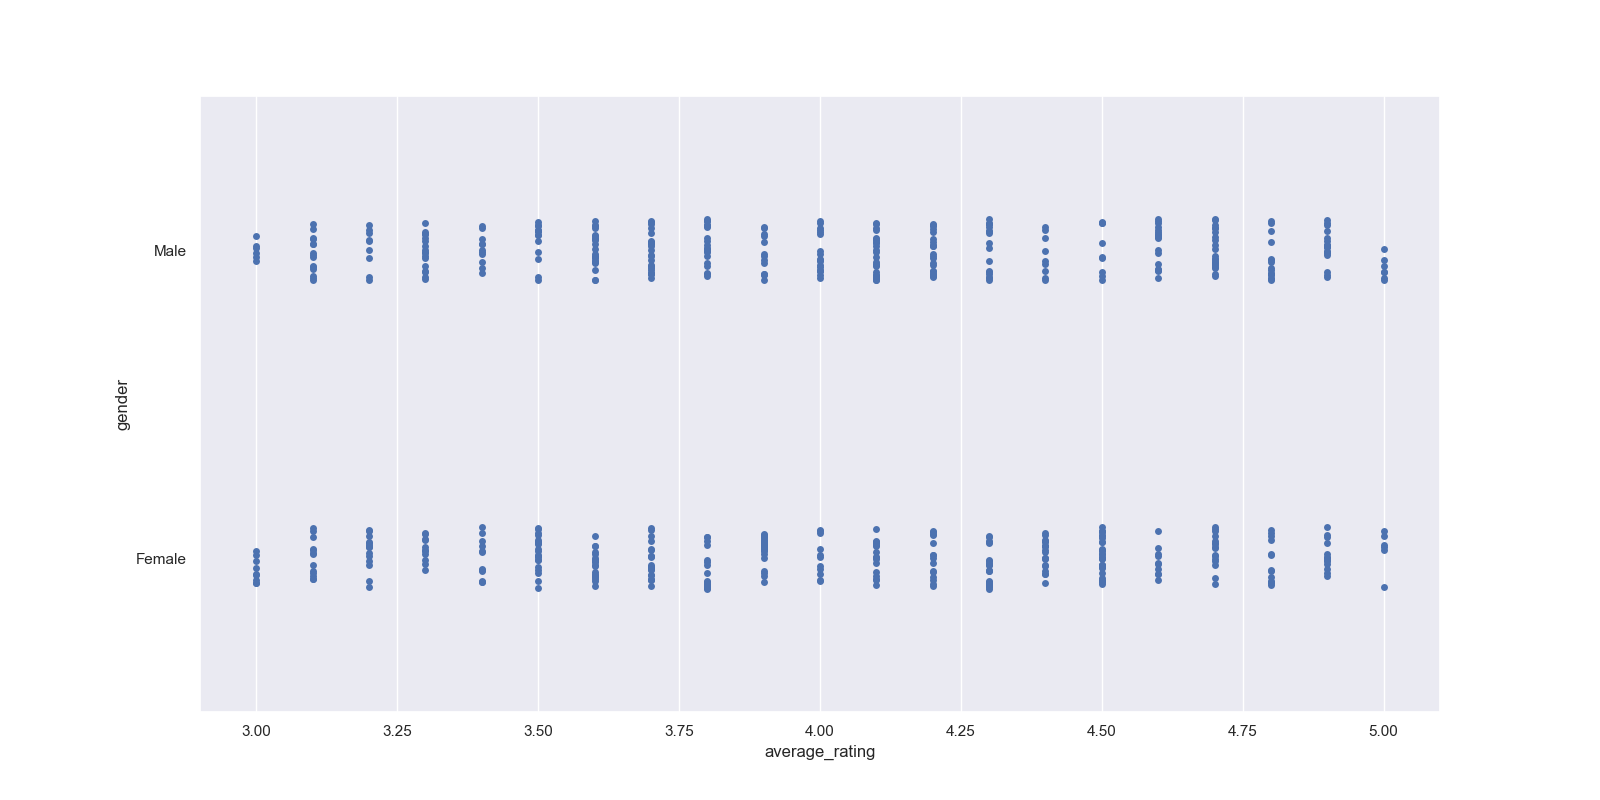

<Axes: xlabel='average_rating', ylabel='gender'>

In [20]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'average_rating', y = 'gender', data = fashiondata_extracted)

# Relationship Between Gender and Categorical Data

<IPython.core.display.Javascript object>


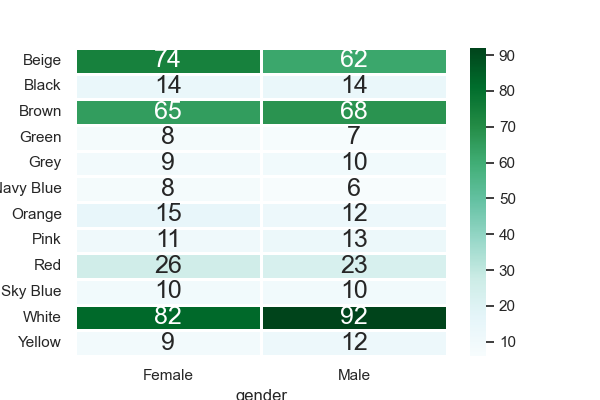

<Axes: xlabel='gender', ylabel='color'>

In [21]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(fashiondata_extracted.groupby(['color', 'gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<IPython.core.display.Javascript object>


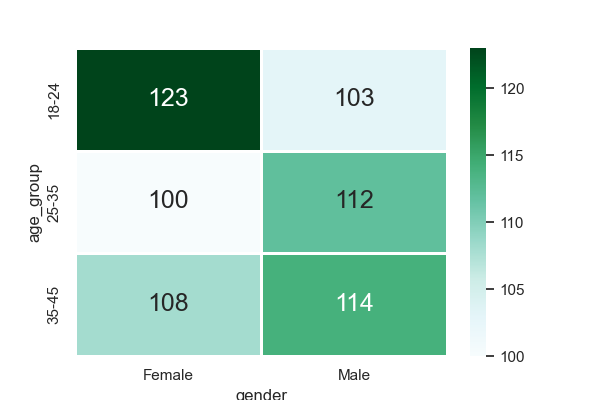

<Axes: xlabel='gender', ylabel='age_group'>

In [22]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(fashiondata_extracted.groupby(['age_group', 'gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<IPython.core.display.Javascript object>


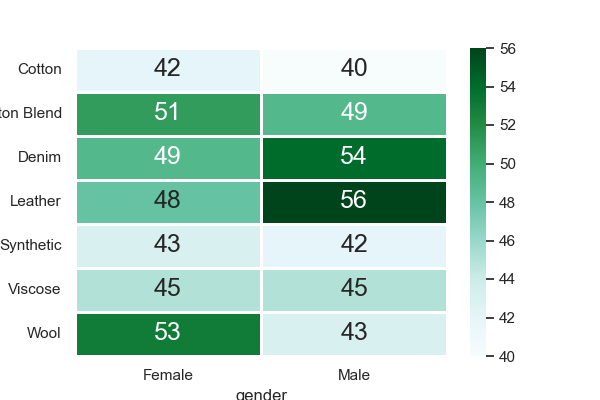

<Axes: xlabel='gender', ylabel='material'>

In [24]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(fashiondata_extracted.groupby(['material', 'gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<IPython.core.display.Javascript object>


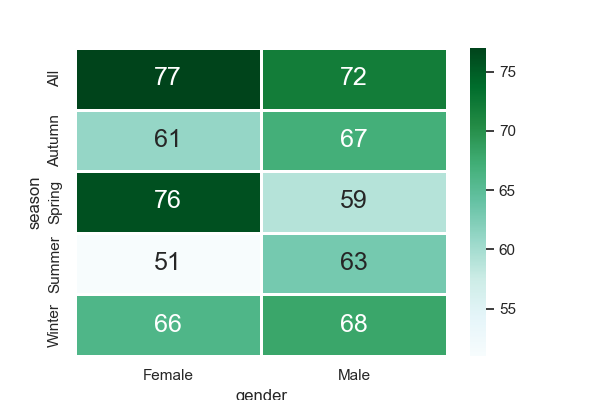

<Axes: xlabel='gender', ylabel='season'>

In [25]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(fashiondata_extracted.groupby(['season', 'gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")